In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
dt = pd.read_csv('Social_Network_Ads (1).csv')

In [3]:
dt.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df = dt.iloc[ : , 2:]


In [5]:
df.sample(5)

,Age,EstimatedSalary,Purchased
222,37,144000,1
8,25,33000,0
203,41,71000,0
374,37,80000,0
3,27,57000,0


In [15]:
# train test split 

from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(df.drop("Purchased" , axis = 1) , df['Purchased'] , test_size = 0.3 , random_state = 42)

In [16]:
print("shape of training data " , x_train.shape , y_train.shape)
print("shape of testing data " , x_test.shape , y_test.shape)

shape of training data  (280, 2) (280,)
shape of testing data  (120, 2) (120,)


In [17]:
#standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)


StandardScaler()

In [18]:
x_train_scaled = scaler.transform(x_train)
x_test_Scaled = scaler.transform(x_test)

In [19]:
scaler.mean_

array([3.75750000e+01, 7.05892857e+04])

In [20]:
x_train_scaled

array([[-0.84252154,  0.1301563 ],
       [ 0.04175763,  0.2777019 ],
       [ 0.72953032, -1.31579061],
       [ 1.61380949,  1.10395728],
       [ 0.82778356, -1.40431797],
       [-1.43204099, -1.25677236],
       [-0.05649561,  0.1301563 ],
       [ 0.43477059, -0.16493491],
       [-0.2530021 ,  0.01211982],
       [ 1.31904976,  2.22530386],
       [ 0.14001087,  0.74984783],
       [-1.33378775,  0.54328399],
       [ 2.00682245,  0.72033871],
       [-1.23553451, -1.43382709],
       [ 0.33651735, -0.34198963],
       [-0.94077478,  0.54328399],
       [ 0.43477059,  0.2777019 ],
       [ 0.43477059,  1.10395728],
       [ 0.82778356,  0.74984783],
       [ 0.9260368 ,  1.25150288],
       [-0.44950858, -1.25677236],
       [-1.82505395, -1.34529973],
       [ 1.12254328,  0.54328399],
       [-0.64601506, -1.64039093],
       [-0.7442683 ,  0.24819278],
       [ 1.02429004,  2.07775825],
       [-0.54776182,  1.36953936],
       [-0.05649561,  0.01211982],
       [-1.9233072 ,

In [21]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)

In [22]:
x_test_Scaled = pd.DataFrame(x_test_Scaled, columns=x_test.columns)

In [26]:
x_train_scaled.head()

,Age,EstimatedSalary
0,-0.842522,0.130156
1,0.041758,0.277702
2,0.729530,-1.315791
3,1.613809,1.103957
4,0.827784,-1.404318


In [23]:
np.round(x_train_scaled.describe() , 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,-0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.7,-0.8
50%,-0.1,0.0
75%,0.7,0.5
max,2.2,2.3


In [25]:
np.round(x_test_Scaled.describe() , 1)

,Age,EstimatedSalary
count,120.0,120.0
mean,0.0,-0.1
std,1.1,1.0
min,-1.9,-1.6
25%,-0.9,-0.9
50%,-0.1,-0.2
75%,0.9,0.5
max,2.2,2.3


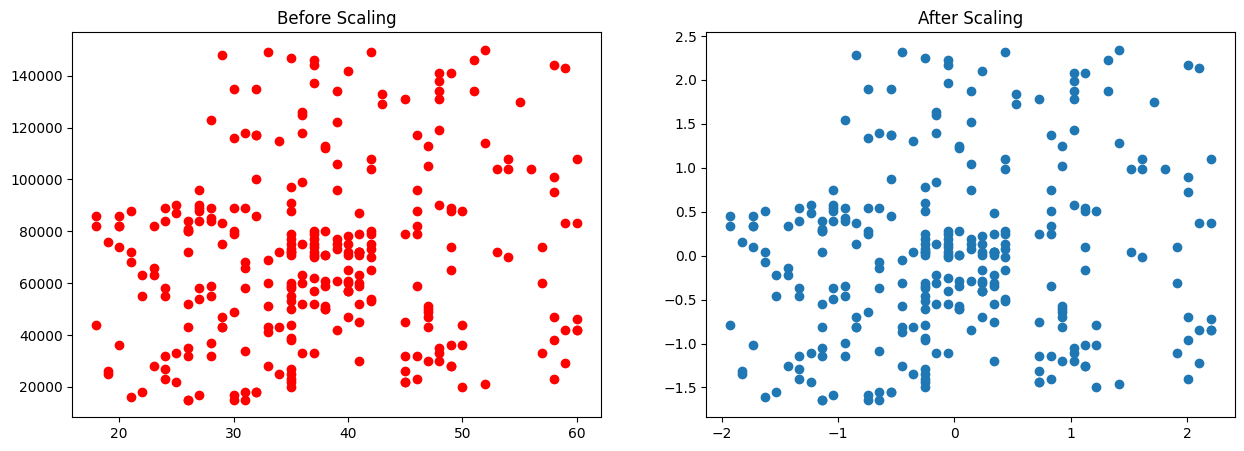

In [29]:
# effect of the scaling pn the data 

fig , (ax1 , ax2) = plt.subplots(ncols = 2 , figsize = (15 , 5))
ax1.scatter(x_train['Age'] , x_train['EstimatedSalary'] , color = 'red')
ax1.set_title('Before Scaling')

ax2.scatter(x_train_scaled['Age'] , x_train_scaled['EstimatedSalary'])
ax2.set_title('After Scaling')
plt.show()

In [31]:
#before scaling 

ax1.set_title('Before Scaling')
sns.kdeplot(x_train['Age'] , ax =ax1 )
sns.kdeplot(x_train['EstimatedSalary'] , ax =ax1)

<Axes: title={'center': 'Before Scaling'}, xlabel='Age', ylabel='Density'>

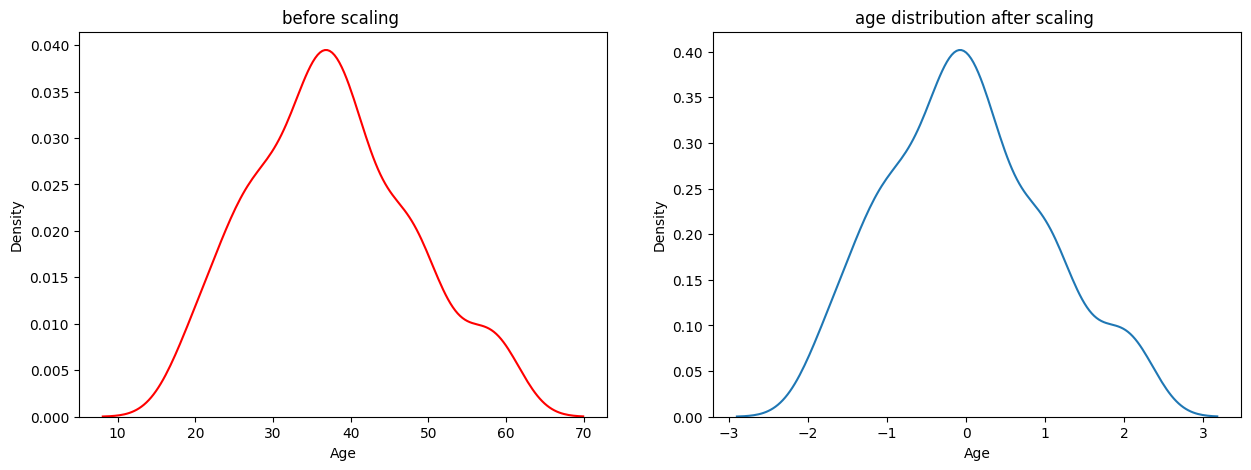

In [35]:
# comparison of the distribution of the data before and after scaling 

fig , (ax1 , ax2) = plt.subplots( ncols = 2 , figsize = (15 , 5))

ax1.set_title("before scaling ")
sns.kdeplot(x_train['Age'] , ax = ax1 , color = 'red')

ax2.set_title("age distribution after scaling ")
sns.kdeplot(x_train_scaled['Age'] , ax = ax2)
plt.show()

# train model on scaled dataset

In [37]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [39]:
lr = lr.fit(x_train_scaled , y_train)


In [40]:
y_pred = lr.predict(x_test_Scaled)


In [43]:
from sklearn.metrics import accuracy_score 
accuracy = accuracy_score(y_test , y_pred)
print("accuracy of the model is " , accuracy)

accuracy of the model is  0.85


# train model on unscaled dataset

In [44]:
from sklearn.linear_model import LogisticRegression


In [45]:
model = LogisticRegression()

In [46]:
model = model.fit(x_train , y_train)

In [47]:
y_pred = model.predict(x_test)

In [48]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test , y_pred)
print("accuracy of unscaled model is ", accuracy)

accuracy of unscaled model is  0.85
